In [8]:
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']
print(treasury_minus)

            10y-2y minus
1998-05-26         -0.02
1998-06-05          0.00
1998-06-08          0.00
1998-06-09         -0.01
1998-06-10         -0.04
...                  ...
2024-05-01         -0.33
2024-05-02         -0.29
2024-05-03         -0.31
2024-05-06         -0.33
2024-05-07         -0.35

[980 rows x 1 columns]


In [7]:
import pandas as pd
kr_stock = search_fred('SPASTT01KRM661N') # 한국 주가
kr_stock.columns = ['stock price'] 
correlation_minus = kr_stock.merge(treasury_minus,left_index=True,right_index = True, how='inner') # 한달별 비교 # 상관관계 지수
print(correlation_minus.corr()) # 장단기 금리차가 역전된 값과 주가의 상관관계

              stock price  10y-2y minus
stock price      1.000000     -0.507538
10y-2y minus    -0.507538      1.000000


,stock price,10y-2y minus
1998-07-01,16.29827,-0.02
2000-03-01,43.56664,-0.13
2000-05-01,35.99751,-0.44
2000-06-01,39.52924,-0.41
2000-08-01,35.84486,-0.27
2000-09-01,31.19091,-0.41
2000-11-01,27.05307,-0.14
2000-12-01,25.95621,-0.10
2006-02-01,66.71258,-0.02
2006-03-01,66.30138,-0.12


In [154]:
kr_stock.merge(treasury_diff,left_index=True, right_index=True, how='inner').corr()  # 장단기 금리차와 주가 상관관계

,stock price,0
stock price,1.00000,-0.06674
0,-0.06674,1.00000


<Axes: >

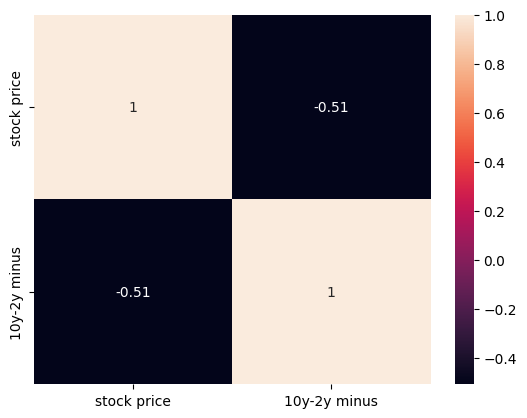

In [155]:
import seaborn as sns
sns.heatmap(correlation_minus.corr(), annot=True) # 상관관계 지수 시각화

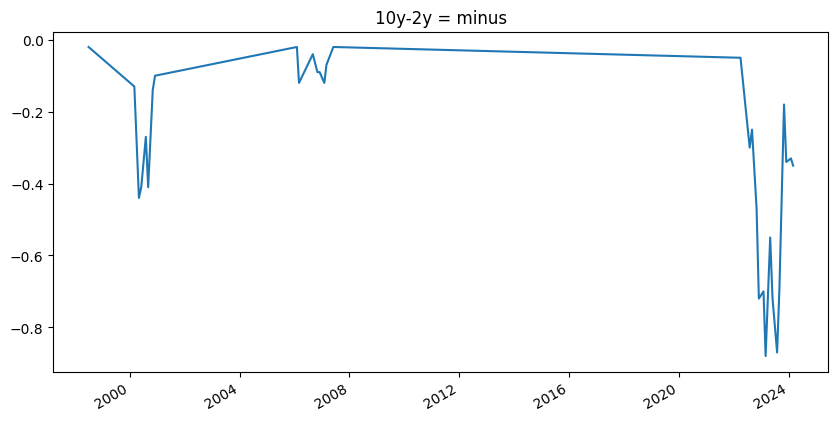

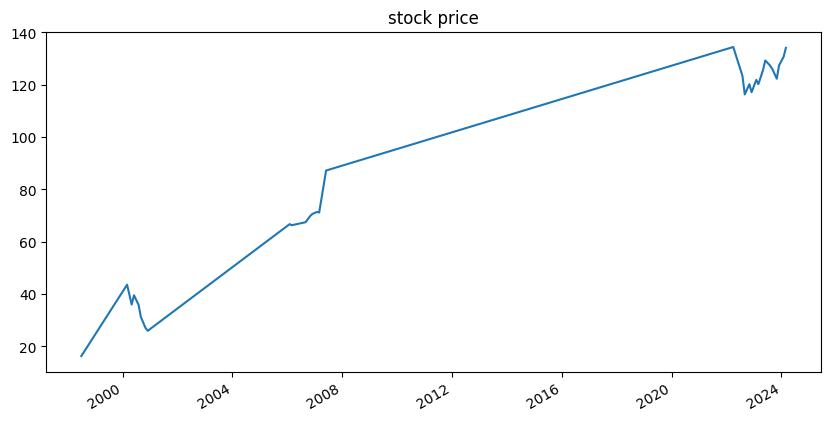

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))  
correlation_minus['10y-2y minus'].plot()
plt.title('10y-2y = minus')
plt.figure(figsize=(10,5))  
correlation_minus['stock price'].plot()
plt.title('stock price')
plt.show()

In [104]:
high_yield = search_fred('BAMLHE00EHYIOAS')
high_yield.columns = ['high yield']

correlation_minus = correlation_minus.merge(high_yield,left_index=True, right_index=True, how='inner') # 고수익 채권과 주가 상관관계

<Axes: >

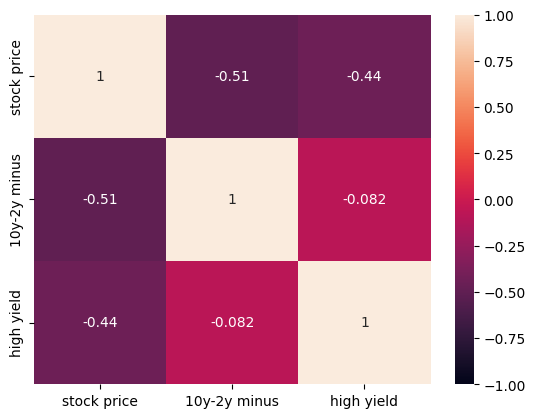

In [105]:
sns.heatmap(correlation_minus.corr(),vmin=-1,vmax=1, annot=True)

In [106]:
kr_stock.merge(high_yield,left_index=True, right_index=True, how='inner').corr() # 한달별 비교

,stock price,high yield
stock price,1.000000,-0.430674
high yield,-0.430674,1.000000


<Axes: >

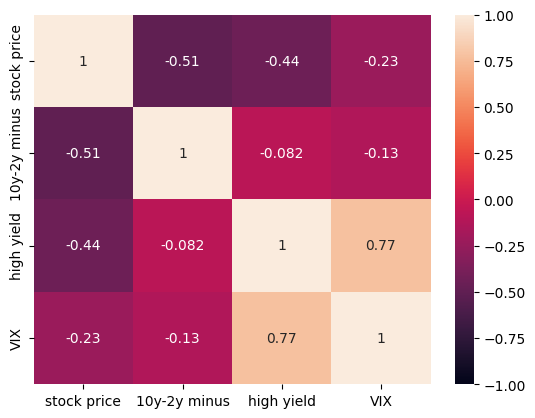

In [107]:
VIX = search_fred('VIXCLS')
VIX.columns = ['VIX']
correlation_minus = correlation_minus.merge(VIX,left_index=True, right_index=True, how='inner') # VIX 지수
sns.heatmap(correlation_minus.corr(),vmin=-1,vmax=1, annot=True)

In [108]:
kr_stock.merge(VIX,left_index=True, right_index=True, how='inner').corr()  # VIX와 주가 상관관계

,stock price,VIX
stock price,1.000000,-0.231775
VIX,-0.231775,1.000000


<Axes: >

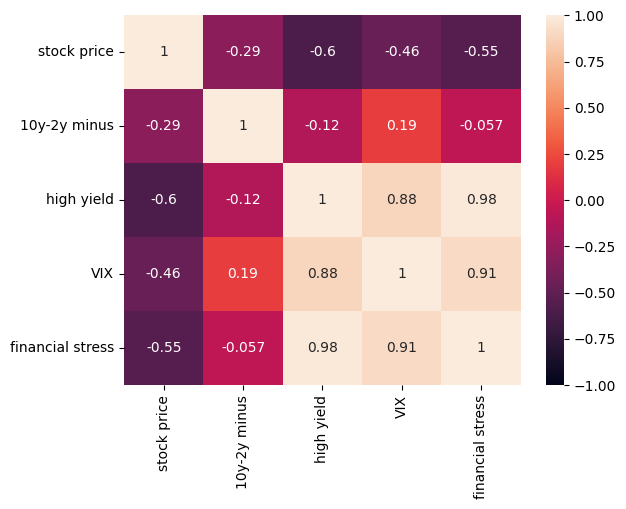

In [109]:
stress = search_fred('STLFSI4')
stress.columns = ['financial stress'] # St. Louis 금융스트레스 지수
correlation_minus = correlation_minus.merge(stress,left_index=True, right_index=True, how='inner') 
sns.heatmap(correlation_minus.corr(),vmin=-1,vmax=1, annot=True)

In [110]:
kr_stock.merge(stress,left_index=True, right_index=True, how='inner').corr()  # VIX와 주가 상관관계

,stock price,financial stress
stock price,1.000000,-0.328284
financial stress,-0.328284,1.000000


<Axes: >

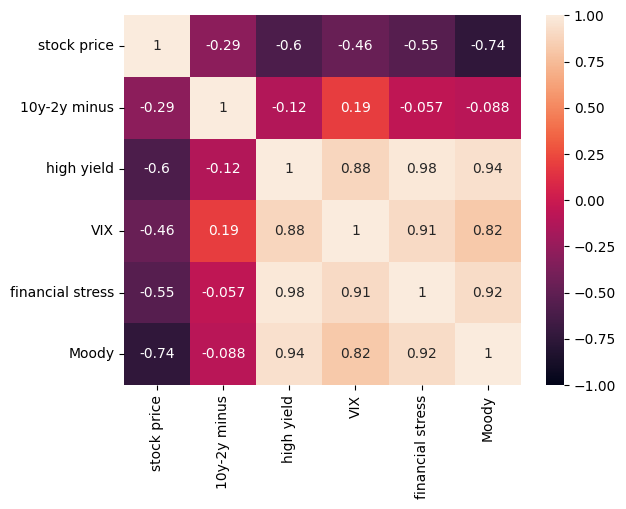

In [111]:
moody = search_fred('BAA10Y') #  미국 10년 국채와 BAA 채권 갭
moody.columns = ['Moody']
correlation_minus = correlation_minus.merge(moody,left_index=True, right_index=True, how='inner')
sns.heatmap(correlation_minus.corr(),vmin=-1,vmax=1, annot=True)

In [112]:
# MOODY와 주가 상관관계
kr_stock.merge(moody,left_index=True, right_index=True, how='inner').corr() 

,stock price,Moody
stock price,1.000000,-0.144679
Moody,-0.144679,1.000000


In [ ]:
loan_lease = search_fred('TOTLL') # 미국은행 대출잔액
loan_lease.columns = ['loan and lease']
correlation_minus = correlation_minus.merge(loan_lease,left_index=True, right_index=True, how='inner')
sns.heatmap(correlation_minus.corr(),vmin=-1,vmax=1, annot=True)
plt.title('10y-2y<0 situation correlation matrix')

In [115]:
loan_lease.merge(correlation_minus,left_index=True, right_index=True, how='left')

,loan and lease,stock price,10y-2y minus,high yield,VIX,financial stress,Moody
1998-01-07,2912.8219,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-14,2911.3764,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-21,2923.0477,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-28,2923.5927,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-04,2924.3403,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-27,12352.9955,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-03,12349.0647,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-10,12349.6148,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-17,12354.3209,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
correlation_minus.index.rename('date', inplace=True)

In [129]:
correlation_minus

,stock price,10y-2y minus,high yield,VIX,financial stress,Moody
date,,,,,,
2000-09-01,31.19091,-0.41,7.76,17.53,-0.0881,2.54
2000-12-01,25.95621,-0.10,12.01,27.48,0.5668,2.66
2006-09-01,67.44895,-0.04,2.89,11.96,-0.9534,1.73
2006-12-01,70.62816,-0.09,2.53,11.66,-0.7993,1.65
2007-06-01,87.19741,-0.02,1.83,12.78,-0.9496,1.60
2022-04-01,134.40960,-0.05,3.98,19.63,-0.5125,1.81
2023-09-01,126.11010,-0.69,4.47,13.09,-0.6716,1.82
2023-12-01,127.32080,-0.34,4.35,12.63,-0.4825,1.71
2024-03-01,134.09240,-0.35,3.46,13.11,-0.7713,1.57


### korea 는 한달에 한번이라 매일의 지표가 있는 NASDAQ으로 해보자

In [39]:
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_diff.columns = ['10y-2y']
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']
print(treasury_minus)

            10y-2y minus
1998-05-26         -0.02
1998-06-05          0.00
1998-06-08          0.00
1998-06-09         -0.01
1998-06-10         -0.04
...                  ...
2024-05-01         -0.33
2024-05-02         -0.29
2024-05-03         -0.31
2024-05-06         -0.33
2024-05-07         -0.35

[980 rows x 1 columns]


In [33]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ'] 
correlation = NASDAQ.merge(treasury_minus,left_index=True,right_index = True, how='inner') 
print(correlation.corr()) # 장단기 금리차가 역전된 값과 주가의 상관관계

                NASDAQ  10y-2y minus
NASDAQ        1.000000     -0.663919
10y-2y minus -0.663919      1.000000


In [34]:
high_yield = search_fred('BAMLHE00EHYIOAS')
high_yield.columns = ['high yield']
correlation = correlation.merge(high_yield,left_index=True, right_index=True, how='inner') # 고수익 채권과 NASDAQ 상관관계

In [35]:
VIX = search_fred('VIXCLS')
VIX.columns = ['VIX']
correlation = correlation.merge(VIX,left_index=True, right_index=True, how='inner') # VIX 지수
print(correlation)

              NASDAQ  10y-2y minus  high yield    VIX
1998-05-26   1778.09         -0.02        5.61  22.07
1998-06-05   1782.92          0.00        5.35  19.78
1998-06-08   1787.77          0.00        5.35  20.58
1998-06-09   1800.76         -0.01        5.16  20.52
1998-06-10   1773.25         -0.04        5.44  21.48
...              ...           ...         ...    ...
2024-04-30  15657.82         -0.35        3.50  15.65
2024-05-01  15605.48         -0.33        3.50  15.39
2024-05-02  15840.96         -0.29        3.51  14.68
2024-05-03  16156.33         -0.31        3.53  13.49
2024-05-06  16349.25         -0.33        3.55  13.49

[979 rows x 4 columns]


In [36]:
moody = search_fred('BAA10Y') #  미국 10년 국채와 BAA 채권 갭
moody.columns = ['Moody']
correlation = correlation.merge(moody,left_index=True, right_index=True, how='inner')

<Axes: >

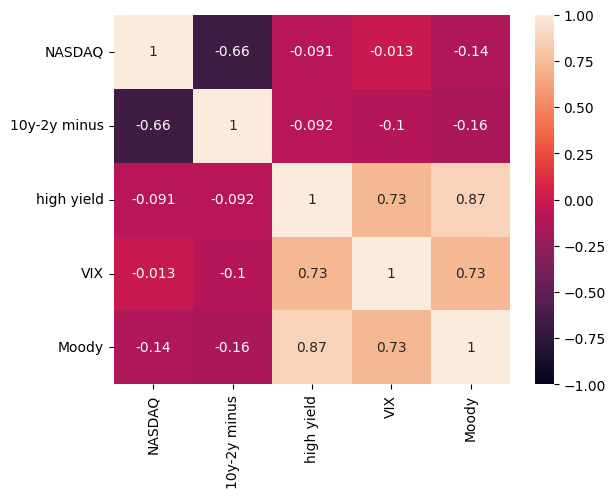

In [37]:
import seaborn as sns
sns.heatmap(correlation.corr(),vmin=-1,vmax=1, annot=True)

,NASDAQ,10y-2y minus,high yield,VIX,Moody
1998-05-26,1778.09,-0.02,5.61,22.07,1.63
1998-06-05,1782.92,0.00,5.35,19.78,1.60
1998-06-08,1787.77,0.00,5.35,20.58,1.60
1998-06-09,1800.76,-0.01,5.16,20.52,1.59
1998-06-10,1773.25,-0.04,5.44,21.48,1.61
...,...,...,...,...,...
2024-04-30,15657.82,-0.35,3.50,15.65,1.44
2024-05-01,15605.48,-0.33,3.50,15.39,1.43
2024-05-02,15840.96,-0.29,3.51,14.68,1.47
2024-05-03,16156.33,-0.31,3.53,13.49,1.49


In [52]:
# 장단기 금리차를 역전 상황이 아니라 그냥 지표로 본다면?
correlation_2 = NASDAQ.merge(VIX,left_index=True,right_index = True, how='inner')
correlation_2 = correlation_2.merge(treasury_diff,left_index=True,right_index = True, how='inner')
correlation_2 = correlation_2.merge(high_yield,left_index=True,right_index = True, how='inner')
correlation_2 = correlation_2.merge(moody,left_index=True,right_index = True, how='inner')

<Axes: >

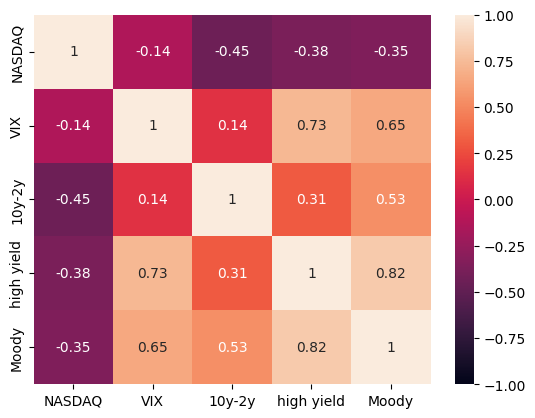

In [54]:
sns.heatmap(correlation_2.corr(),vmin=-1,vmax=1, annot=True)

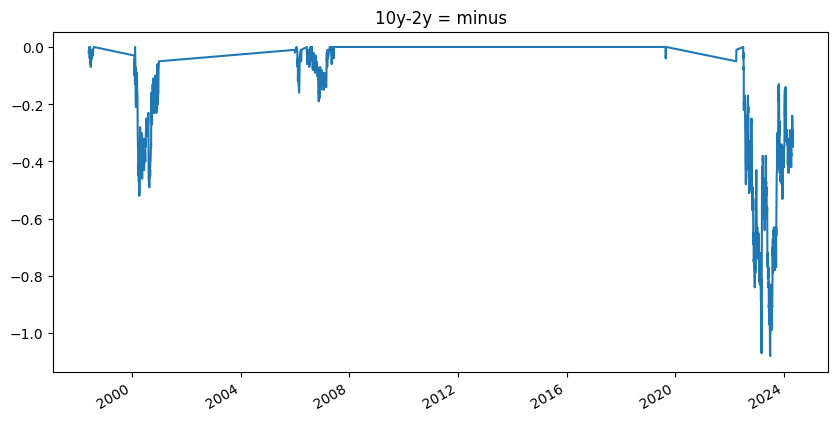

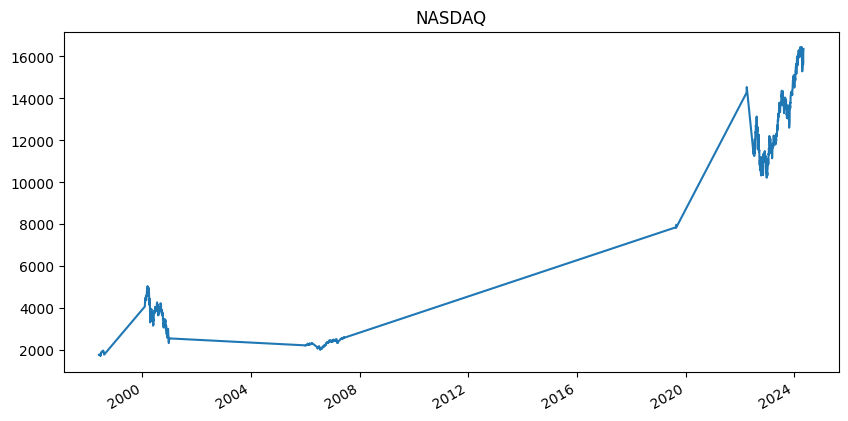

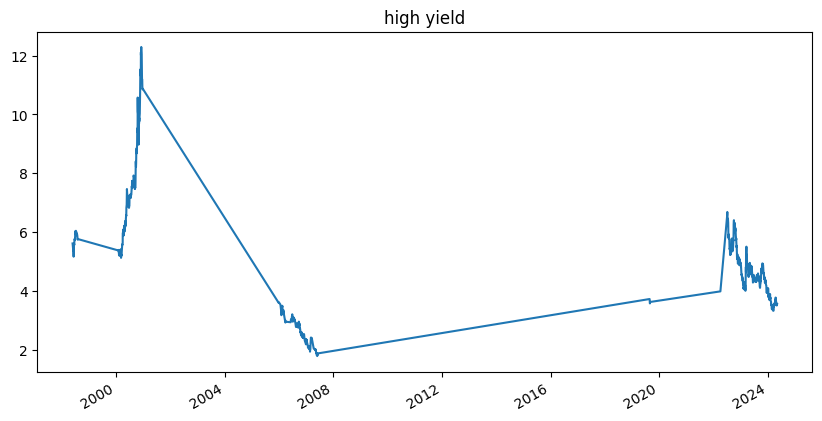

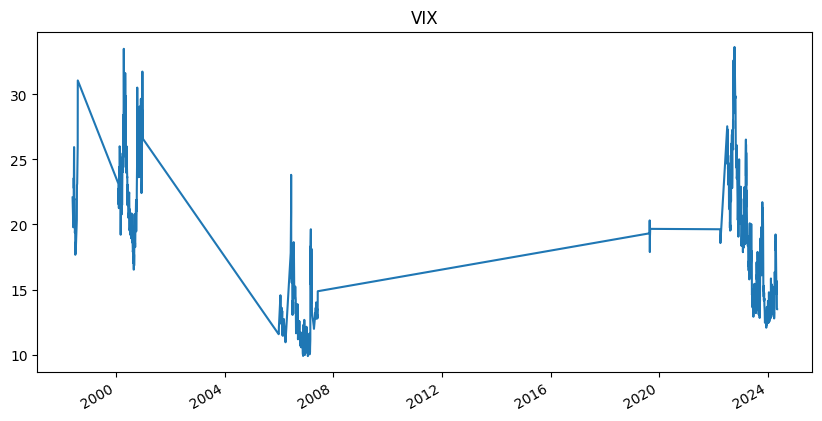

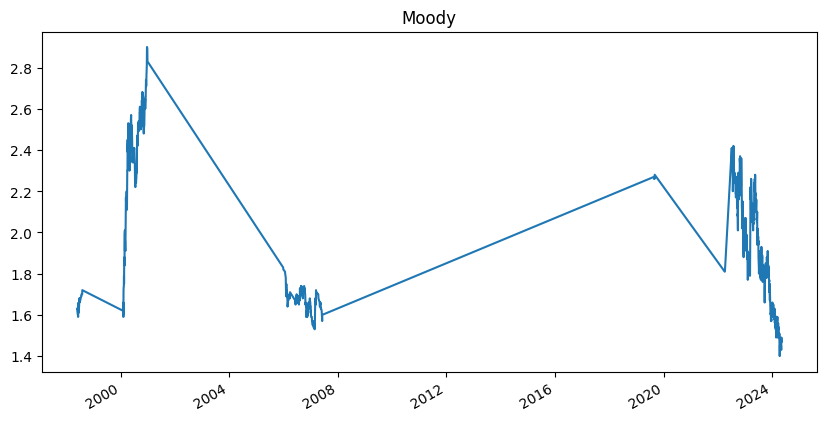

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))  
correlation['10y-2y minus'].plot()
plt.title('10y-2y = minus')
plt.figure(figsize=(10,5))  
correlation['NASDAQ'].plot() 
plt.title('NASDAQ')
plt.figure(figsize=(10,5)) 
correlation['high yield'].plot()
plt.title('high yield')
plt.figure(figsize=(10,5)) 
correlation['VIX'].plot()
plt.title('VIX')
plt.figure(figsize=(10,5)) 
correlation['Moody'].plot()
plt.title('Moody')
plt.show()

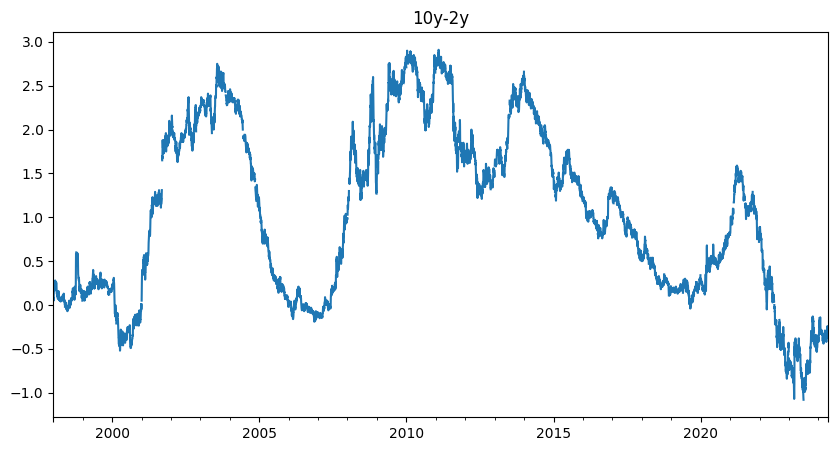

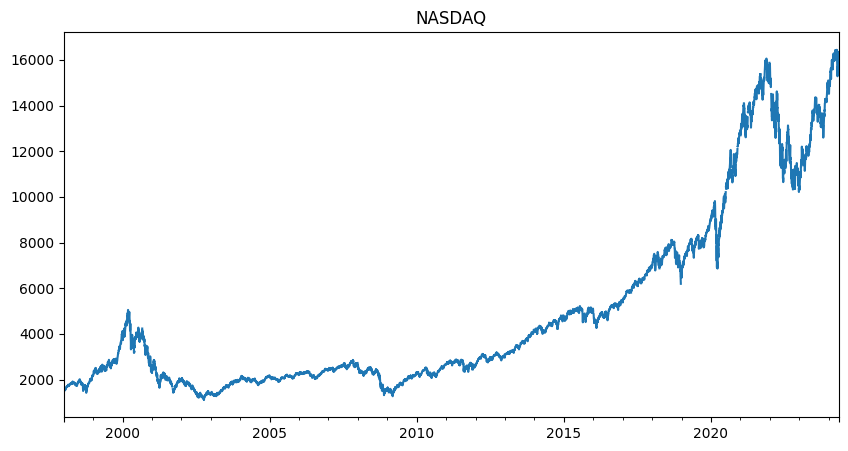

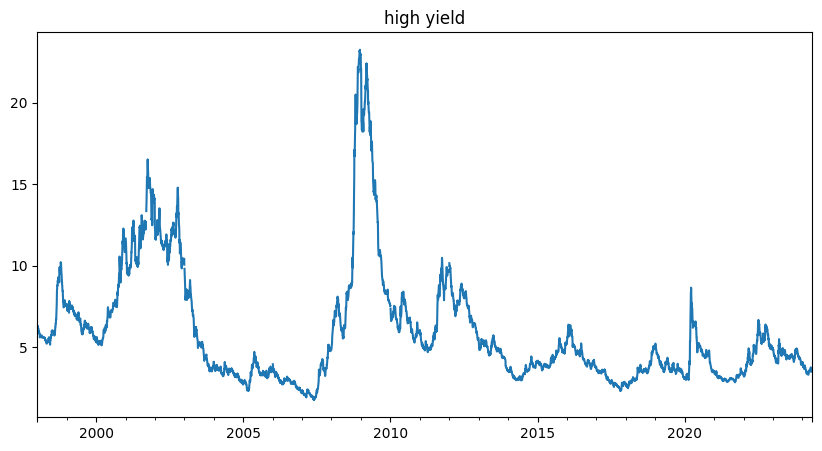

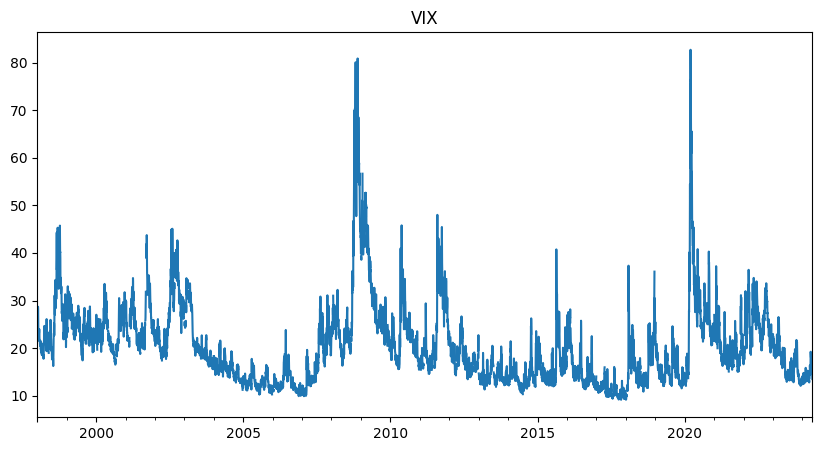

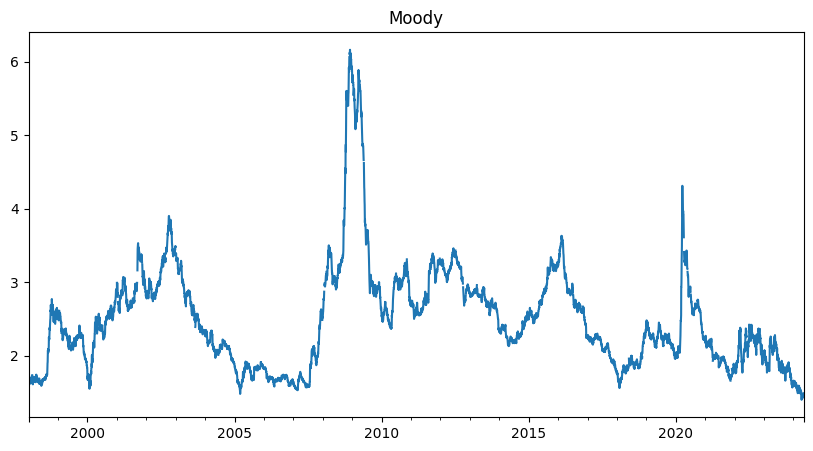

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))  
correlation_2['10y-2y'].plot()
plt.title('10y-2y')
plt.figure(figsize=(10,5))  
correlation_2['NASDAQ'].plot() 
plt.title('NASDAQ')
plt.figure(figsize=(10,5)) 
correlation_2['high yield'].plot()
plt.title('high yield')
plt.figure(figsize=(10,5)) 
correlation_2['VIX'].plot()
plt.title('VIX')
plt.figure(figsize=(10,5)) 
correlation_2['Moody'].plot()
plt.title('Moody')
plt.show()

In [68]:
correlation

,NASDAQ,10y-2y minus,high yield,VIX,Moody
1998-05-26,1778.09,-0.02,5.61,22.07,1.63
1998-06-05,1782.92,0.00,5.35,19.78,1.60
1998-06-08,1787.77,0.00,5.35,20.58,1.60
1998-06-09,1800.76,-0.01,5.16,20.52,1.59
1998-06-10,1773.25,-0.04,5.44,21.48,1.61
...,...,...,...,...,...
2024-04-30,15657.82,-0.35,3.50,15.65,1.44
2024-05-01,15605.48,-0.33,3.50,15.39,1.43
2024-05-02,15840.96,-0.29,3.51,14.68,1.47
2024-05-03,16156.33,-0.31,3.53,13.49,1.49


### 10y-2y 유일한 선행 지표일듯 (기간 차이별로 NASDAQ 수익률을 보자)
- 3개월
- 6개월
- 9개월
- 12개월

In [200]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ'] 
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1)
NASDAQ

,NASDAQ
1998-01-01,NaN
1998-01-02,1581.53
1998-01-05,1594.12
1998-01-06,1580.14
1998-01-07,1561.70
...,...
2024-04-30,15657.82
2024-05-01,15605.48
2024-05-02,15840.96
2024-05-03,16156.33


In [201]:
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']
print(treasury_minus)

            10y-2y minus
1998-05-26         -0.02
1998-06-05          0.00
1998-06-08          0.00
1998-06-09         -0.01
1998-06-10         -0.04
...                  ...
2024-05-01         -0.33
2024-05-02         -0.29
2024-05-03         -0.31
2024-05-06         -0.33
2024-05-07         -0.35

[980 rows x 1 columns]


            10y-2y minus    NASDAQ
1998-06-26         -0.02   1869.53
1998-07-08          0.00   1935.39
1998-07-09         -0.01   1939.82
1998-07-10         -0.04   1943.04
1998-07-15         -0.05   1994.54
...                  ...       ...
2024-04-25         -0.29  15611.76
2024-04-26         -0.32  15927.90
2024-05-01         -0.39  15605.48
2024-05-02         -0.34  15840.96
2024-05-03         -0.32  16156.33

[599 rows x 2 columns]


Text(0.5, 1.0, '1 months difference')

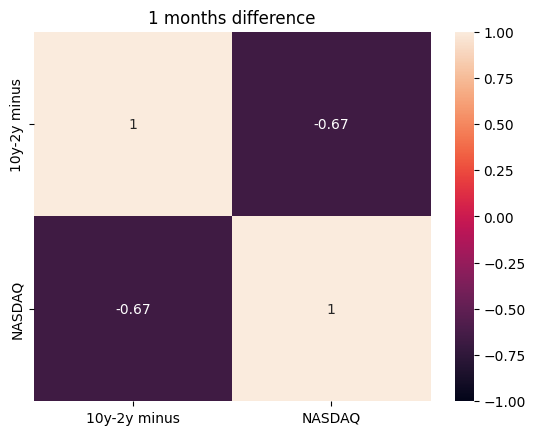

In [202]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ']
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1)
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']


treasury_minus.index = treasury_minus.index + pd.DateOffset(months=1)
treasury_minus
#treasury_minus와 stock_price를 merge
merged_df = pd.merge(treasury_minus, NASDAQ, how='inner', left_index=True, right_index=True)
print(merged_df)
sns.heatmap(merged_df.corr(),vmin=-1,vmax=1, annot=True) # 1개월
plt.title('1 months difference')

            10y-2y minus    NASDAQ
1998-08-26         -0.02   1768.13
1998-09-08          0.00   1660.86
1998-09-09         -0.01   1624.55
1998-09-10         -0.04   1585.33
1998-09-11         -0.01   1641.64
...                  ...       ...
2024-04-30         -0.30  15657.82
2024-04-30         -0.28  15657.82
2024-05-01         -0.33  15605.48
2024-05-02         -0.33  15840.96
2024-05-06         -0.30  16349.25

[769 rows x 2 columns]


Text(0.5, 1.0, '3 months difference')

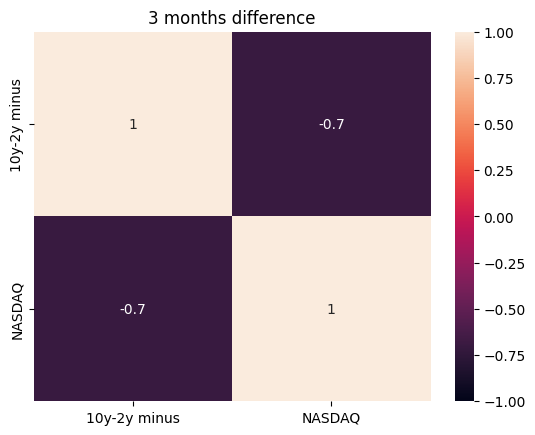

In [203]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ']
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1)
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']

treasury_minus.index = treasury_minus.index + pd.DateOffset(months=3)
treasury_minus
#treasury_minus와 stock_price를 merge
merged_df = pd.merge(treasury_minus, NASDAQ, how='inner', left_index=True, right_index=True)
print(merged_df)
sns.heatmap(merged_df.corr(),vmin=-1,vmax=1, annot=True) # 3개월
plt.title('3 months difference')

            10y-2y minus    NASDAQ
1998-11-26         -0.02       NaN
1998-12-08          0.00   2034.75
1998-12-09         -0.01   2050.42
1998-12-10         -0.04   2015.96
1998-12-11         -0.01   2029.31
...                  ...       ...
2024-04-30         -0.19  15657.82
2024-05-01         -0.18  15605.48
2024-05-02         -0.31  15840.96
2024-05-03         -0.26  16156.33
2024-05-06         -0.26  16349.25

[666 rows x 2 columns]


Text(0.5, 1.0, '6 months difference')

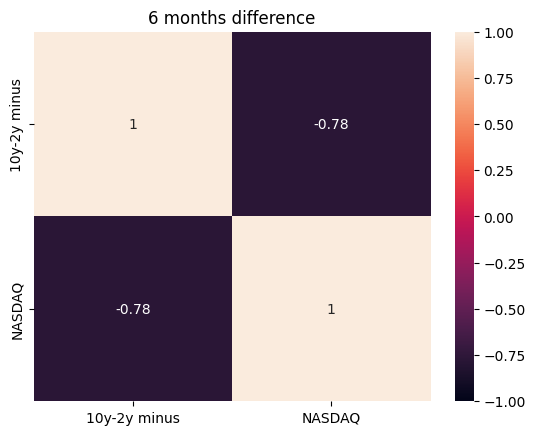

In [204]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ']
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1) 
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']

treasury_minus.index = treasury_minus.index + pd.DateOffset(months=6)
treasury_minus
#treasury_minus와 stock_price를 merge
merged_df = pd.merge(treasury_minus, NASDAQ, how='inner', left_index=True, right_index=True)
print(merged_df)
sns.heatmap(merged_df.corr(),vmin=-1,vmax=1, annot=True) # 6개월
plt.title('6 months difference')

            10y-2y minus    NASDAQ
1999-02-26         -0.02   2288.03
1999-03-05          0.00   2337.11
1999-03-08          0.00   2397.62
1999-03-09         -0.01   2392.94
1999-03-10         -0.04   2406.00
...                  ...       ...
2024-04-26         -0.96  15927.90
2024-04-30         -0.91  15657.82
2024-05-01         -0.87  15605.48
2024-05-02         -0.80  15840.96
2024-05-03         -0.70  16156.33

[675 rows x 2 columns]


Text(0.5, 1.0, '9 months difference')

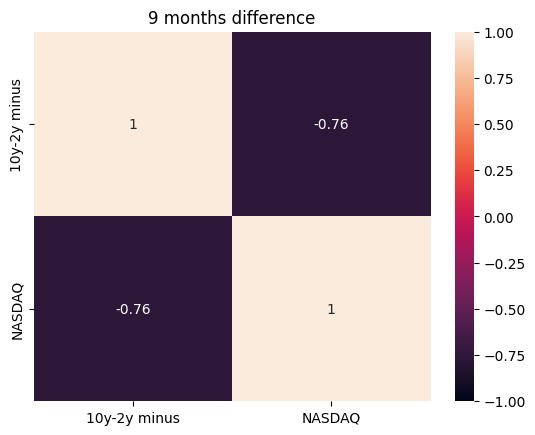

In [205]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ']
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1)
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']

treasury_minus.index = treasury_minus.index + pd.DateOffset(months=9)
treasury_minus
#treasury_minus와 stock_price를 merge
merged_df = pd.merge(treasury_minus, NASDAQ, how='inner', left_index=True, right_index=True)
print(merged_df)
sns.heatmap(merged_df.corr(),vmin=-1,vmax=1, annot=True) # 9개월
plt.title('9 months difference')

            10y-2y minus    NASDAQ
1999-05-26         -0.02   2427.18
1999-06-08          0.00   2474.56
1999-06-09         -0.01   2519.35
1999-06-10         -0.04   2484.62
1999-06-11         -0.01   2447.88
...                  ...       ...
2024-04-25         -0.46  15611.76
2024-04-26         -0.47  15927.90
2024-05-01         -0.55  15605.48
2024-05-02         -0.53  15840.96
2024-05-03         -0.51  16156.33

[559 rows x 2 columns]


Text(0.5, 1.0, '12 months difference')

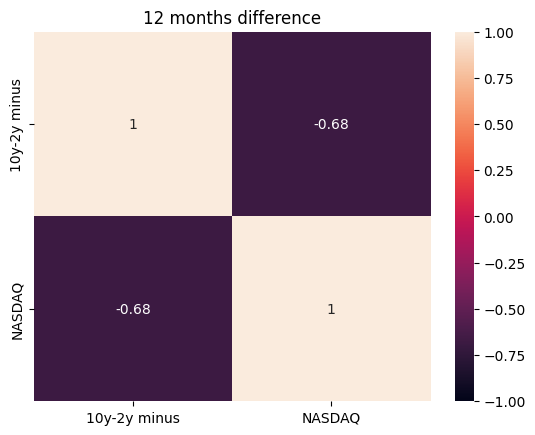

In [206]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ']
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1)
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']

treasury_minus.index = treasury_minus.index + pd.DateOffset(months=12)
treasury_minus
#treasury_minus와 stock_price를 merge
merged_df = pd.merge(treasury_minus, NASDAQ, how='inner', left_index=True, right_index=True)
print(merged_df)
sns.heatmap(merged_df.corr(),vmin=-1,vmax=1, annot=True) # 12개월
plt.title('12 months difference')

            10y-2y minus    NASDAQ
2000-05-26         -0.02   3205.11
2000-06-05          0.00   3821.76
2000-06-08          0.00   3825.56
2000-06-09         -0.01   3874.84
2000-06-12          0.00   3767.91
...                  ...       ...
2021-08-27         -0.04  15129.50
2021-08-30          0.00  15265.89
2021-09-03          0.00  15363.52
2024-04-01         -0.05  16396.83
2024-04-04         -0.01  16049.08

[307 rows x 2 columns]


Text(0.5, 1.0, '24 months difference')

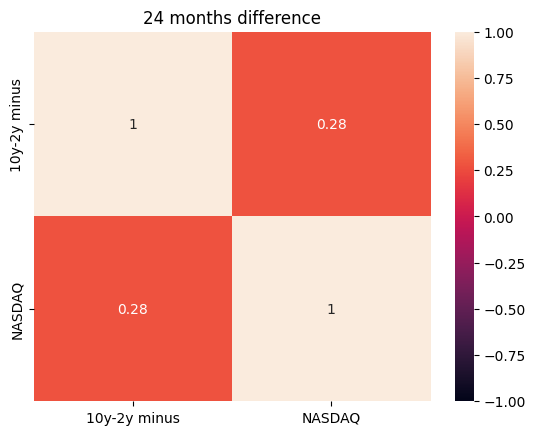

In [207]:
import pandas as pd
NASDAQ = search_fred('NASDAQCOM') # NASDAQ 주가
NASDAQ.columns = ['NASDAQ']
#NASDAQ['NASDAQ'] = NASDAQ['NASDAQ'].pct_change(1) 
from python_EDA import search_fred
treasury_diff = search_fred('T10Y2Y') # 장단기 금리차 10년-2년
treasury_minus = treasury_diff.loc[treasury_diff.values<=0] # 역전된 데이터
treasury_minus.columns = ['10y-2y minus']

treasury_minus.index = treasury_minus.index + pd.DateOffset(months=24)
treasury_minus
#treasury_minus와 stock_price를 merge
merged_df = pd.merge(treasury_minus, NASDAQ, how='inner', left_index=True, right_index=True)
print(merged_df)
sns.heatmap(merged_df.corr(),vmin=-1,vmax=1, annot=True) # 24개월
plt.title('24 months difference')